In [2]:
#!/usr/bin/env python 
##from six.moves import urllib
from scipy.io import loadmat
##mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
##mnist_path = "./mnist-original.mat"
##response = urllib.request.urlopen(mnist_alternative_url)
##with open(mnist_path, "wb") as f:
##        content = response.read()
##        f.write(content)
mnist_raw = loadmat("./mnist-original.mat")
mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
        }
print("Success!")

Success!


In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from common.functions import *

from sklearn import preprocessing
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


X=mnist["data"] 

Y=mnist["target"] 
x_train, x_test, y_train_label, y_test_label = train_test_split(X, Y, test_size=0.1) 
print(x_train)
x_train = x_train.astype(np.float32) 
x_train = x_train / 255.0   
x_test = x_test.astype(np.float32) 
x_test = x_test / 255.0   
print(x_train) 
print(x_test)
print(x_train.shape)
            

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(63000, 784)


In [26]:
Y.shape  

(70000,)

In [4]:
y_train = preprocessing.LabelBinarizer().fit_transform(y_train_label)
y_test = preprocessing.LabelBinarizer().fit_transform(y_test_label)

In [28]:
print(y_train)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]]


In [29]:
print(y_test)

[[1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]


In [30]:
print(x_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [31]:
y_test.shape  


(7000, 10)

630.0
epoch:0, train acc:0.0988253968254, test acc:0.0967142857143, elapsed:0.9755730628967285[sec]
epoch:1, train acc:0.920888888889, test acc:0.923857142857, elapsed:0.696160078048706[sec]
epoch:2, train acc:0.94119047619, test acc:0.940285714286, elapsed:0.7067558765411377[sec]
epoch:3, train acc:0.956746031746, test acc:0.954857142857, elapsed:0.7696409225463867[sec]
epoch:4, train acc:0.964904761905, test acc:0.960714285714, elapsed:0.7412559986114502[sec]
epoch:5, train acc:0.970793650794, test acc:0.966714285714, elapsed:0.7084989547729492[sec]
epoch:6, train acc:0.976984126984, test acc:0.970142857143, elapsed:0.6824018955230713[sec]
epoch:7, train acc:0.978698412698, test acc:0.969428571429, elapsed:0.6817770004272461[sec]
epoch:8, train acc:0.983476190476, test acc:0.972571428571, elapsed:0.7098760604858398[sec]
epoch:9, train acc:0.986714285714, test acc:0.974428571429, elapsed:0.7525179386138916[sec]
epoch:10, train acc:0.987523809524, test acc:0.973571428571, elapsed:0.737

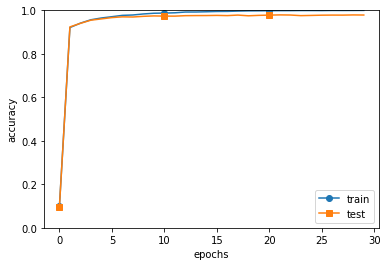

In [5]:
import time
from common.multi_layer_net import MultiLayerNet
from common.optimizer import * 

weight_decay_lambda = 0 
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100], output_size=10,
                        activation="sigmoid",weight_decay_lambda=weight_decay_lambda)
optimizer = Adam()

max_epochs = 30
train_size = x_train.shape[0]
batch_size = 100 

train_loss_list = []
train_acc_list = []
test_acc_list = [] 

iter_per_epoch = max(train_size / batch_size, 1) 
print(iter_per_epoch)
epoch_cnt = 0 

for i in range(1000000000):
    start = time.time()
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, y_train)
        test_acc = network.accuracy(x_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc) 
        end = time.time() - start

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + ", elapsed:{}".format(end) + "[sec]")

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break 

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()            

In [5]:
## CNN 

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from deep_convnet import DeepConvNet
from common.trainer import Trainer 

network = DeepConvNet()
trainer = Trainer(network, x_train, y_train, x_test, y_test,
                  epochs=20, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()
 

ValueError: not enough values to unpack (expected 4, got 2)